# 大規模データ解析入門 (3)　課題 - 解答例

---
## Exercise 1.
__コインを20回投げて表が出た回数を記録する施行を10,000回おこなう。  
ただし、コインの表と裏が出る確率はそれぞれ70%、30%とする。__

ヒント: 実習内容 [3. シミュレーションでSNP-indexを10,000個作る](03_large_data_analysis_ja.ipynb#1.3)

In [5]:
import numpy as np
np.random.seed(100)  
    # 常に同じデータを発生させるために書いています。
    # seed()内の数字を変えれば、得られる結果も変わります（初期値:100）。

#--- 以下にプログラムを追記してください ---

omote = np.random.binomial(n=20, p=0.7, size=10000)

#確認
omote

array([14, 15, 14, ..., 15, 18, 17])

---
## Exercise 2. 
__`Exercise 1`で発生させた10,000回分のデータのヒストグラムを描く。__

ヒント: 実習内容 [3. シミュレーションでSNP-indexを10,000個作る](03_large_data_analysis_ja.ipynb#1.3)

Text(0,0.5,'Counts')

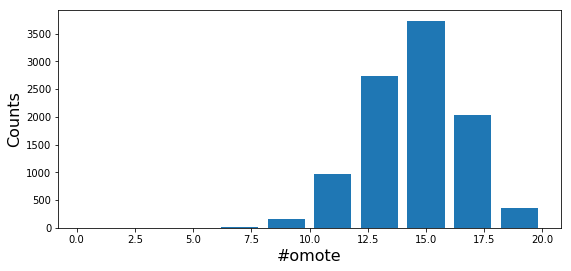

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

#--- 以下にプログラムを追記してください ---

# グラフフィールドの設定
fig = plt.figure(figsize=[9,4])    

# ヒストグラムを描く
plt.hist(omote, bins=10, range=[0,20], rwidth=0.8)
        # binsで「表示するbarの数」を指定している
        # rangeで最小値と最大値を指定している
        # rwidthで「表示するbarの横幅」を指定している

# グラフタイトル、x軸ラベル、y軸ラベル
plt.xlabel('#omote', fontsize=16)  
plt.ylabel('Counts', fontsize=16)

---
## Exercise 3.
__`Exercise 1`で発生させた10,000回のデータのうち、表が20回出た施行は何回あったか調べる。__

ヒント: 実習内容 [3. シミュレーションでSNP-indexを10,000個作る](03_large_data_analysis_ja.ipynb#1.3)

答え: 9回

In [10]:
count = omote[ (omote == 20) ]
print(len(count))

9


---
## Exercise 4.  <small>提出不要課題</small>
 
__乱数を使って、F2集団 200個体に遺伝子型（AA, Aa, aa）を割り当てる。  
ただし、各遺伝子型が選ばれる比率は AA : Aa : aa = 1 : 2 : 1 とする。__

ヒント: [numpy.random.multinomial](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multinomial.html)を使う

答え: AA => 46個体, Aa => 102個体, aa => 52個体

In [35]:
import numpy as np
np.random.seed(100)  
    # 常に同じデータを発生させるために書いています。
    # seed()内の数字を変えれば、得られる結果も変わります（初期値:100）。

#--- 以下にプログラムを追記してください ---

genotypes = np.random.multinomial(200, pvals=[0.25,0.5,0.25], size=None)

genotypes

array([ 46, 102,  52])

---
## Exercise 5.  <small>提出不要課題</small>

__`Exercise 4`で発生させた遺伝子型情報付き200個体中に含まれる`a`アリルの頻度を求める。__

ヒント1: 
- AA遺伝子型の個体 => `A`アリル2個、`a`アリル0個
- Aa遺伝子型の個体 => `A`アリル1個、`a`アリル1個
- aa遺伝子型の個体 => `A`アリル0個、`a`アリル2個

ヒント2: 200個体中には合計400個のアリルがある

答え: 0.515

In [41]:
(genotypes[1] * 1 + genotypes[2] * 2) / ((genotypes[0] + genotypes[1] + genotypes[2]) * 2) 

0.515

---
## Exercise 6.  <small>提出不要課題</small>

__`Exercise 4`で発生させた遺伝子型情報付きの200個体のうち、20個体をランダムに選ぶ。__

ヒント1: AA遺伝子型の個体を`0`, Aaを`1`, aaを`2`と表記し、`0`が53個、`1`が97個、`2`が50個のリストを作成する 

ヒント2: [numpy.random.choice](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.choice.html)を使う

答え: AA遺伝子型(`0`) => 1個体、Aa遺伝子型(`1`) => 11個体、aa遺伝子型(`2`) => 8個体

In [55]:
import numpy as np
np.random.seed(100)  
    # 常に同じデータを発生させるために書いています。
    # seed()内の数字を変えれば、得られる結果も変わります（初期値:100）。

#--- 以下にプログラムを追記してください ---

# 集団リストを作成
pop = [0] * genotypes[0] + [1] * genotypes[1] + [2] * genotypes[2]

# ２０個体を抽出（同じ個体が重複して選抜されないようにreplace=False）
subpop = np.random.choice(pop, size=20, replace=False)

# 20個体を表示
subpop

array([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 0])

---
## Exercise 7.  <small>提出不要課題</small>

__`Exercise 6`で選ばれた20個体中に含まれる`a`アリルの頻度を求める。__

ヒント1: Exercise 5ほぼ同じ

ヒント2: [別解] Exercise 6で各遺伝子型の個体を数字で割り当てた。その数字はその個体に含まれる`a`アリルの数に等しい

答え: 0.675

In [56]:
np.sum(subpop) / (len(subpop) * 2)

0.675